Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 6, 6, 128)         0         
_____________________________________

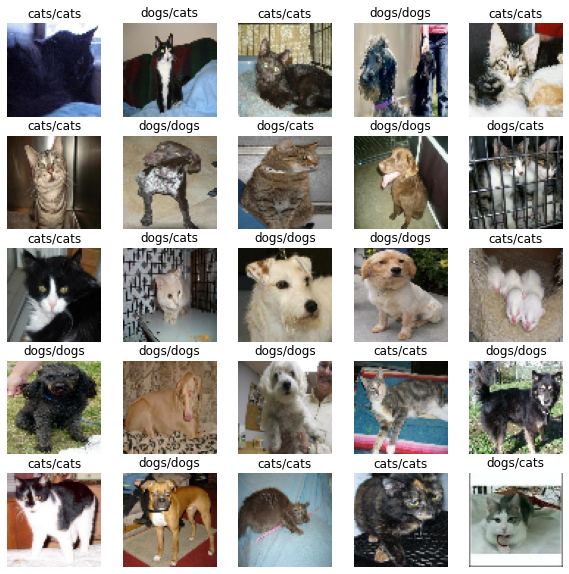

In [15]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMAGE_SIZE=[64,64]

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/root/kaggle-dataset/cat-and-dog/training_set",
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    batch_size=500,
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/root/kaggle-dataset/cat-and-dog/test_set",
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
)

model = keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),    
    keras.layers.Flatten(),
    keras.layers.Dense(96, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

model.summary()

monitor = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(train_dataset,
    validation_data=test_dataset,
    callbacks=[monitor],
    verbose=2,
    epochs=100,
    workers=1,
)

print(test_dataset.element_spec)
print(tf.data.DatasetSpec.from_value(test_dataset))

class_names = test_dataset.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    #print(images[i].shape)
    plt.imshow(images[i].numpy().astype("uint8"))
    predict = model.predict(images[i].numpy().reshape([1,64,64,3]))
    #print(predict.shape)
    #plt.title(class_names[tf.math.argmax(labels[i])])
    plt.title(class_names[tf.math.argmax(predict[0])]+"/"+class_names[tf.math.argmax(labels[i])])
    plt.axis("off")

#predict = model.predict(test_dataset)

#print(predict[0])
#iterator = iter(test_dataset)
#sample = iterator.get_next();

#print(sample[0][0])

plt.show();
